## Carga de módulos (librerías)

* La clase pasada hicimos un refresh de Pandas.
* Hoy vamos a terminar de hacer el refresh, y comenzamos con valores missing, y posiblemente datos atípicos.

## Trabajar con index
Como se ha mencionado, una parte importante de los DataFrames son los index, que por lo general es un valor númerico de 0 a n-1, donde n es el número de observaciones totales en el DataFrame.

Sin embargo, podemos mover una columna del cuerpo del DataFrame al índice, de la siguiente forma:

* set_index(column_name)

* reset_index()

También puede tener varios índices, solo debemos pasar una lista sobre el método set_index(). Y para restablecer al DataFrame original,

Adicional, el método reset_index() tiene un argumento drop que le permite eliminar el índice.

## Tablas dínamicas
Otra forma de calcular estadísticas agrupadas son las tablas dínamicas. Algunos argumentos interesantes son:

* values es la columna que desea resumir.
* index es la columna por la que desea agrupar.
* aggfunc como se quiere agregar (por ejemplo, mediana)
Nota:

De forma predeterminada el método **.pivot_table()** toma el valor medio para cada grupo.
Para agrupar por dos variables, podemos pasar un segundo nombre de variable al argumento columns.
En caso de tener valores missing, podemos completarlos (imputarlos) usando el argumento *fill_value*.

## Unir datos (merge)
En muchas ocasiones tendremos diferentes archivos planos, y para analizar lo que me interesa debo unir los diferentes archivos.

# Clase 2

## Inspeccionemos los datos

## Pasos para tratar valores missing
Convierta todos los valores missing en valores nulos. 
* En algunos casos, los valoress missing puede aparecer con valores como 999, -1, '?', entre otros.
* Analice la cantidad y el tipo de datos que faltan.
* Eliminar o imputar adecuadamente los datos missing.
* Evaluar y comparar el rendimiento del conjunto de datos tratado/imputado.


## Detectemos los valores missing
En los casos donde encontramos valoress missing codificados con algún valor, podemos usar el argumento na_values del método .read_csv() si estamos tratando con un archivo csv.

## Cantidad de datos missing

## ¿Cuándo y como eliminar los datos missing?

Se recomienda eliminar las columnas con más del 20% de valores missing

## Manejo de datos faltantes

Pandas tiene una método **.fillna()** que nos puede ayudar con la imptación de los valores missing.

Valores para imputar:

* promedio.
* mediana.
* moda (valor más frecuente)

Diseño de Scikit-Learn
Estos son los principios de diseño más importantes:

* Consistencia: Todos los objetos comparten una interfaz simple y consistente:

  * Estimadores: Cualquier objeto que pueda estimar algunos parámetros basándose en un set de datos se llama "estimador" (por ejemplo, imputer es un estimador). La estimación en si la realiza el método .fit() y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisado; el segundo set de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro (como strategy de imputer) y debe establecerse como una variable de instancia (por lo general, mediante un parametro constructor).
  * Transformadores: Algunos estimadores (como imputer) también pueden transformar un conjunto de datos; se denominan transformadores. De nuevo, la API es sencilla: la transformación la lleva a cabo el método .transform() con el conjunto de datos para transformar como parámetro. Devuelve el conjunto de datos transformado. Esta transformación suele depender de los parámetros aprendidos, como es el caso de imputer.
  * Predictores: Por últimos, algunos estimadores, cuando se les da un conjunto de datos, son capaces de hacer predicciones; se llaman predictores. Por ejemplo, el modelo LinearRegression. Un predictor tiene un método .predict() que toma un conjunto de datos de observaciones nuevas y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método .score() que mide la calidad de las predicciones correspondientes, dado un conjunto de prueba (y las etiquetas correspondientes, en el caso de algoritmos de aprendizaje supervisado).
* Inspección: Todos los hiperparámetros del estimador son accesibles de forma directa mediante variables de instancia públicas (por ejemplo, imputer.strategy) y todos los parámetros aprendidos del estimador son accesibles mediante variables de instancia pública con un guion bajo como sufijo (por ejemplo, imputer.statistics_).

* Composición: Los bloques de construcción existentes se reutilizan tanto como sea posible. Por ejemplo, es fácil crear un estimador Pipeline a partir de una secuencia de transformadores seguida de un estimador final, como veremos más adelante.

In [2]:
import numpy as np

In [25]:
data = np.random.normal(loc=1000, scale=100, size=50).tolist()
data[:5]

[907.9648276460841,
 1039.2105134849141,
 1050.4791630996615,
 1133.8239412727023,
 960.4745473196359]

In [42]:
class StandardScaler:
    def __init__(self, data: list):
        self.data = data
        self.mu = None
        self.sd = None

    def fit(self):
        self.mu = np.mean(self.data)
        self.sd = np.std(self.data)
        return self

    def transform(self):
        transformed_data = [(i - self.mu)/self.sd for i in self.data]
        return transformed_data

In [57]:
class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.b_0 = None
        self.b_1 = None

    def fit(self):
        self.b_1 = np.cov(np.stack((self.X, self.y), axis=0))/np.var(self.X)
        self.b_0 = np.mean(self.y) - self.b_1 * np.mean(self.X)
        return self

    def predict(self):
        y_hat = self.b_0 + self.b_1 * self.X
        return y_hat

In [58]:
X = np.random.normal(loc=1000, scale=100, size=100)
y = 1.5 * X + np.random.normal(loc=0, scale=1, size=100)

lr = LinearRegression(X=X, y=y)

In [59]:
lr.fit()

In [60]:
lr.b_1

array([[1.01010101, 1.51550111],
       [1.51550111, 2.27388471]])

In [43]:
scaler = StandardScaler(data=data)

In [44]:
scaler.fit()

In [45]:
print(f"La media de los datos es: {scaler.mu}")
print(f"La desviación estandar es: {scaler.sd}")

La media de los datos es: 1037.7426803281342
La desviación estandar es: 94.76821781242467


In [46]:
data

[907.9648276460841,
 1039.2105134849141,
 1050.4791630996615,
 1133.8239412727023,
 960.4745473196359,
 1067.6914557783648,
 1040.474778613891,
 988.4708937301506,
 958.5807673674577,
 1045.6285534431097,
 1200.6084554956565,
 1101.5298750495372,
 1025.5488659428443,
 1003.9743118891889,
 934.6994495705119,
 1038.3932886952202,
 1140.481331668384,
 853.4241855649045,
 1011.9272826023823,
 1079.8528439389706,
 947.2997019067752,
 1154.2820297027797,
 1110.6439039723575,
 1286.6460552760634,
 1247.7294643739929,
 1038.2320494060139,
 1088.5612486061736,
 1106.0983412188302,
 1117.6630248771417,
 1180.7912583420552,
 899.4748620069615,
 1129.3311898710308,
 898.6162787298473,
 1016.812590662784,
 1079.865673627723,
 1010.2903278815432,
 884.7945980986516,
 901.4207845937071,
 872.8324558789486,
 1073.5376297995163,
 984.8987001759599,
 1078.7970760575486,
 1060.8278843026926,
 1004.0410956246086,
 939.7728679198524,
 999.3652018330343,
 954.2030165523664,
 1063.6245173120492,
 1070.336941

In [47]:
new_data = scaler.transform()
new_data

[-1.3694237971101255,
 0.015488664772458633,
 0.13439614108536616,
 1.0138553110151591,
 -0.8153380404539795,
 0.3160213006169267,
 0.028829267330577845,
 -0.5199188898487839,
 -0.8353213217258354,
 0.08321221288115914,
 1.7185695682268034,
 0.6730863594761,
 -0.12866987125815949,
 -0.35632587821566064,
 -1.0873184400447036,
 0.006865259072127242,
 1.0841044995021547,
 -1.9449399705716994,
 -0.27240564739592776,
 0.4443490083794273,
 -0.9543598108004235,
 1.2297303047875463,
 0.7692581471619232,
 2.626443555587225,
 2.215793320725804,
 0.005163852282716893,
 0.5362406242420323,
 0.721293092437307,
 0.8433243379884419,
 1.5094572981952457,
 -1.4590104310587226,
 0.9664475248883372,
 -1.4680702540345396,
 -0.22085557952326573,
 0.44448438803569335,
 -0.2896788932015955,
 -1.6139174689579334,
 -1.4384769375345836,
 -1.7401427214300198,
 0.37771048456594664,
 -0.5576128935627837,
 0.4332084814623573,
 0.2435964768299341,
 -0.3556211721764285,
 -1.0337834209586387,
 -0.40496148794378084,
 -

In [63]:
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer

diabetes = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/pima-indians-diabetes%20data.csv")
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


<AxesSubplot:>

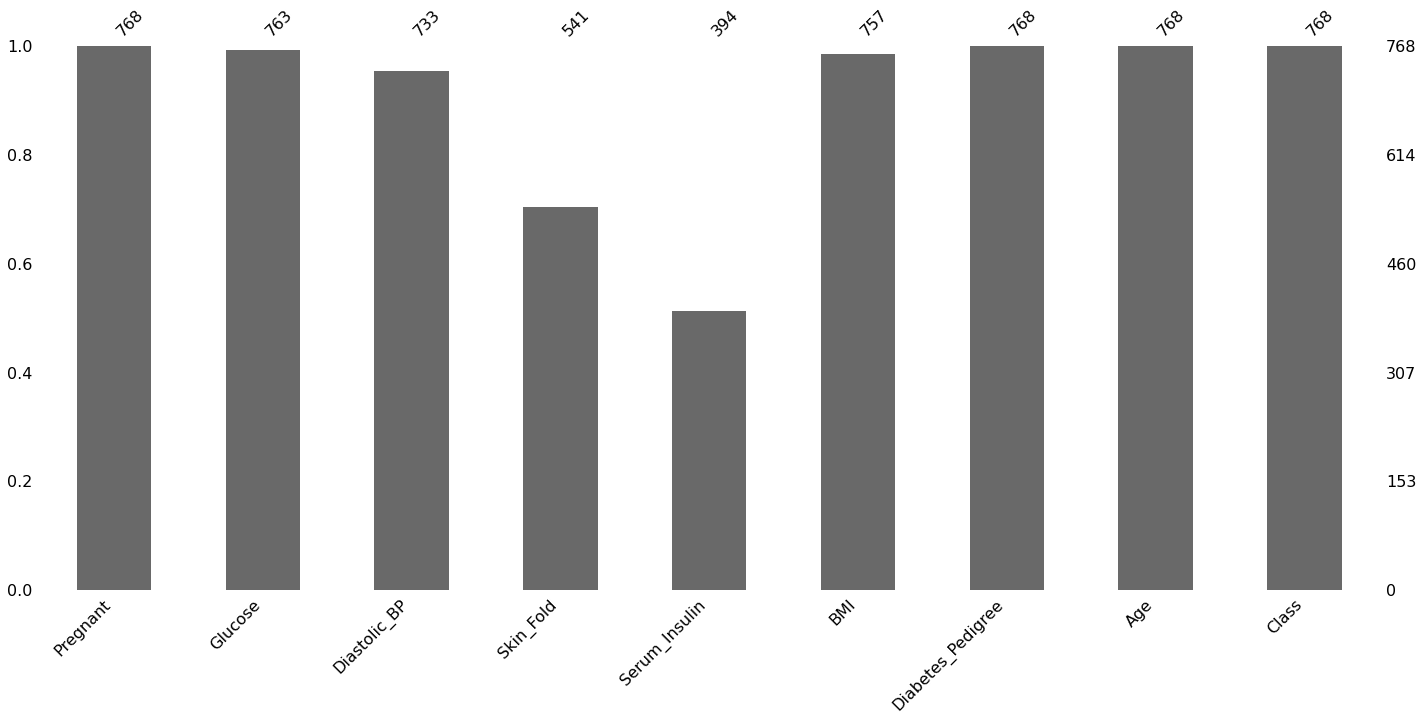

In [64]:
msno.bar(df=diabetes)

In [65]:
imputer = SimpleImputer(strategy='median')

imputer.fit(diabetes.drop("Class", axis=1))

SimpleImputer(strategy='median')

In [66]:
imputer.statistics_

array([  3.    , 117.    ,  72.    ,  29.    , 125.    ,  32.3   ,
         0.3725,  29.    ])

In [67]:
diabetes["Pregnant"].median()

3.0